In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [84]:
df = pd.read_json('~/Desktop/iris.json')
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
train, test = train_test_split(df, test_size = 0.2, stratify = df['species'], random_state = 42)

In [86]:
fn = ["sepal length", "sepal width", "petal length", "petal width"]
cn = ['setosa', 'versicolor', 'virginica']

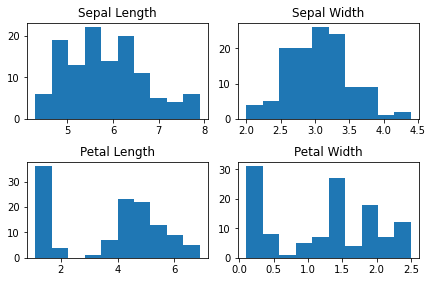

In [87]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepalLength'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepalWidth'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petalLength'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petalWidth'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

In [88]:
X_train = train[['sepalLength','sepalWidth','petalLength','petalWidth']]
y_train = train.species
X_test = test[['sepalLength','sepalWidth','petalLength','petalWidth']]
y_test = test.species

In [89]:
X_train

,sepalLength,sepalWidth,petalLength,petalWidth
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [90]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.967


In [91]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.06071875, 0.93928125])

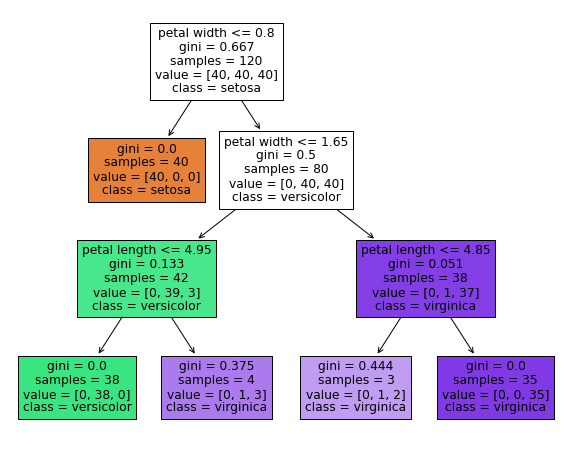

In [92]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);